In [1]:
import pandas as pd
import numpy as np

In [3]:
# Upload iris_data.csv to dataFrame
df_iris = pd.read_csv('iris_data.csv')

# Show first five rows
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [7]:
# split data into X and y
X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [20]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)

In [21]:
model.fit(X_train, y_train) # 학습 하기

DecisionTreeClassifier(max_depth=2)

In [22]:
y_preds = model.predict(X_test) # 종속변수의 값 예측하기

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



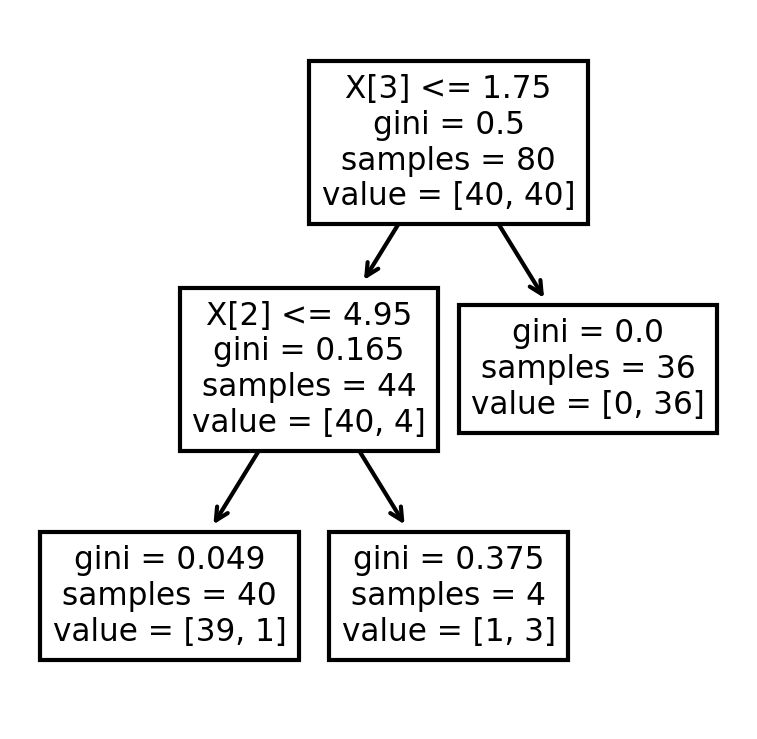

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model) # 모형의 시각화
plt.show() # 화면에 출력
fig.savefig('tree_vis.png') # 시각화 결과물을 이미지 파일로 저장

# Feature importance

In [25]:
model.feature_importances_

array([0.        , 0.        , 0.10458898, 0.89541102])

In [28]:
# Zip columns and feature_importances_ into dict
feature_dict = dict(zip(X.columns, model.feature_importances_))
[(k,v) for k, v in sorted(feature_dict.items(), key=lambda item: item[1], reverse=True)]

[('petal_width', 0.8954110185300336),
 ('petal_length', 0.10458898146996648),
 ('sepal_length', 0.0),
 ('sepal_width', 0.0)]

<AxesSubplot:>

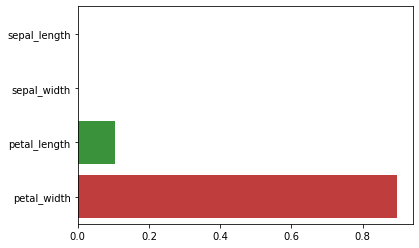

In [30]:
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=X.columns)

In [13]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['entropy', 'gini'],
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf':[0.01, 0.02, 0.03, 0.04, 0.05],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50],
        'max_depth':[2,4,6,8],
        }
gs_model = GridSearchCV(model, param_grid=params, cv=5)

In [15]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'min_samples_split': [2, 3, 4, 5, 6, 8, 10]})

In [16]:
gs_model.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 0.01,
 'min_samples_split': 2}

In [31]:
best_gs_model=gs_model.best_estimator_

In [32]:
y_preds_gs = best_gs_model.predict(X_test)
# 위의 결과는 아래와 같습니다
# y_preds_gs = gs_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_preds_gs))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

